<a href="https://colab.research.google.com/github/gcombarGitHub/exhaustive_forest/blob/main/Paper_Dec_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Example:
import pandas as pd
import numpy as np

N = 15
Id = range(1,N+1)

# Definir los valores de la primera columna
x1 = np.array(["R", "G", "B", "R", "G", "B", "R", "G", "B", "R", "G", "B", "R", "G", "B"])

# Definir los valores de la segunda columna
x3 = np.random.choice(["S", "M", "L"], size=N)

# Definir los valores de la tercera columna
x2 = np.array(["Y","Y","Y","Y","Y","Y","Y","N","N","N","N","N","N","N","N"])

# Definir los valores de la cuarta columna
x4 = np.random.choice(["R", "S"], size=N)

# Definir los valores de la cuarta columna
x5 = np.random.choice(["A", "B"], size=N)

# Definir los valores de la cuarta columna
x6 = np.random.choice(["C", "D"], size=N)

# Definir los valores de la cuarta columna
x7 = np.random.choice(["E", "F", "G"], size=N)


# Definir los valores de la última columna
y = np.array(["Y", "Y", "N", "Y", "Y", "N","Y", "Y", "Y","N","Y", "Y", "N","Y", "Y"])

# Crear el dataframe
df = pd.DataFrame({"Id": Id,"y": y,"x1": x1, "x2": x2, "x3": x3, "x4": x4, "x5":x5, "x6":x6, "x7":x7})

# Imprimir el dataframe
print(df)


    Id  y x1 x2 x3 x4 x5 x6 x7
0    1  Y  R  Y  M  S  A  D  F
1    2  Y  G  Y  S  R  B  C  F
2    3  N  B  Y  M  S  B  C  G
3    4  Y  R  Y  M  R  B  C  F
4    5  Y  G  Y  L  S  A  C  F
5    6  N  B  Y  L  S  A  D  G
6    7  Y  R  Y  L  R  B  D  E
7    8  Y  G  N  M  S  B  C  G
8    9  Y  B  N  S  S  B  D  G
9   10  N  R  N  S  R  B  D  G
10  11  Y  G  N  S  R  B  D  E
11  12  Y  B  N  M  R  B  C  F
12  13  N  R  N  L  S  B  C  G
13  14  Y  G  N  M  R  B  D  F
14  15  Y  B  N  S  S  B  D  G


In [ ]:
#@title Algorithm
from itertools import combinations
from collections import Counter

N = 1
Resumen = []
item = []
tam_todos = len(list(df[df.columns[0]]))
for p in [2,3,4,5,6]: #Combinaciones de 2 subconjuntos
    subconjuntos = list(combinations(df.columns[2:len(df.columns)], p))

    for caracteristicas in subconjuntos:                # Todos los subconjuntos
        todos = list(df[df.columns[0]])   # saco los id's
        l =[]                                           # lista de todos los grupos
        sublista = []                                   # Grupos a grupo queda en sublista
        item.append(caracteristicas)
        while len(todos) :                              # recorremos todos los elementos
          sublista.append(todos.pop())
          x = df.loc[df['Id'] == sublista[0], caracteristicas].values
          #print(x)
          for Z in todos: #busco los iguales a sublista[0]
            y = df.loc[df['Id'] == Z, caracteristicas].values

            if (x == y).all():
              sublista.append(Z)

          l.append(tuple(sublista))
          #En sublista quedaron los iguales al primero.
          #Actualizo a "todos" quitando los de sublista
          todos = [x for x in todos if x not in sublista]

          sublista = []
          #break

        #Eliminamos singleton para evitar sobre-ajuste
        l = [temp for temp in l if len(temp) != 1]

        tam_l = sum([len(x) for x in l])
        item.append(round(tam_l/tam_todos,2)) #Cuantos clasificó

        #Ahora hay que medír qué tan buena fue la clasificación
        obj = df[df.columns[N]]  #Columna objetivo
        resultado = []                         #resultado de cada grupo
        resul_x_grupo = []
        #print(l)
        for l_ele in l:
            for ele in l_ele:
              ind = df.loc[df[df.columns[0]] == ele].index[0]
              #print(ind, ele, obj[ind])
              resultado.append(obj[ind])
              #print(ele,obj[ind] )
            #print(resultado)
            #print(max(Counter(resultado).values())/len(resultado))
            resul_x_grupo.append(max(Counter(resultado).values())/len(resultado))
            #print(resultado)
            resultado = []

        #Añado el promedio de las clasificaciones de los grupos
        try:
          item.append( sum(resul_x_grupo)/len(resul_x_grupo) )
          item.append(len(resul_x_grupo)) #El tamaño de los grupos
          item.append(p) #Cantidad de subconjuntos
          #print(resul_x_grupo)
          #break
        except:
          item.append(0)
          item.append(0)
          item.append(p) #Cantidad de subconjuntos
          #print(caracteristicas)


        Resumen.append(tuple(item))
        item = []


        #break




      # total_grupos = 1
      # for x in caracteristicas:  #Este for cuenta los grupos esperados
      #   total_grupos *= df[x].nunique()
print("En la variable Resumen quedó:")
print("Subconjunto, porcentaje de clasificación, exactitud de predicción, número de grupos, num de subconjuntos")

Resumen


En la variable Resumen quedó:
Subconjunto, porcentaje de clasificación, exactitud de predicción, número de grupos, num de subconjuntos


[(('x1', 'x2'), 1.0, 1.0, 6, 2),
 (('x1', 'x3'), 0.8, 0.8333333333333334, 6, 2),
 (('x1', 'x4'), 0.93, 0.7333333333333333, 5, 2),
 (('x1', 'x5'), 0.8, 0.75, 3, 2),
 (('x1', 'x6'), 1.0, 0.7222222222222222, 6, 2),
 (('x1', 'x7'), 0.73, 0.875, 4, 2),
 (('x2', 'x3'), 0.87, 0.7708333333333333, 4, 2),
 (('x2', 'x4'), 1.0, 0.75, 4, 2),
 (('x2', 'x5'), 1.0, 0.7222222222222222, 3, 2),
 (('x2', 'x6'), 1.0, 0.7208333333333333, 4, 2),
 (('x2', 'x7'), 0.87, 0.9, 4, 2),
 (('x3', 'x4'), 0.93, 0.7999999999999999, 5, 2),
 (('x3', 'x5'), 0.93, 0.65, 4, 2),
 (('x3', 'x6'), 0.93, 0.7, 5, 2),
 (('x3', 'x7'), 0.73, 0.7916666666666666, 4, 2),
 (('x4', 'x5'), 1.0, 0.707936507936508, 3, 2),
 (('x4', 'x6'), 1.0, 0.75, 4, 2),
 (('x4', 'x7'), 0.93, 0.875, 4, 2),
 (('x5', 'x6'), 0.93, 0.6666666666666666, 3, 2),
 (('x5', 'x7'), 0.93, 0.875, 4, 2),
 (('x6', 'x7'), 1.0, 0.8333333333333333, 5, 2),
 (('x1', 'x2', 'x3'), 0.4, 1.0, 3, 3),
 (('x1', 'x2', 'x4'), 0.53, 1.0, 4, 3),
 (('x1', 'x2', 'x5'), 0.67, 1.0, 4, 3),
 ((

In [ ]:
len(Resumen), 2**7-7-2

(119, 119)

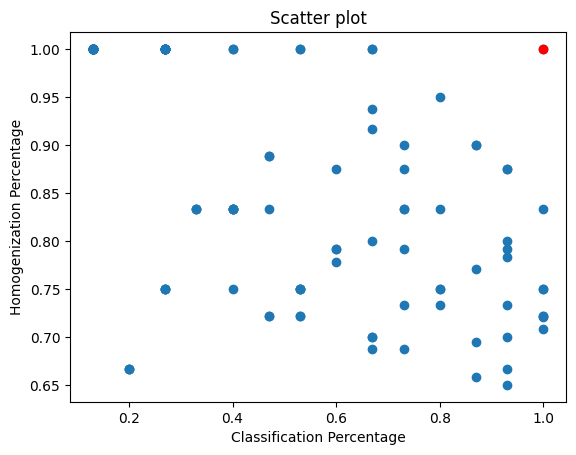

Para la variable:
y
El mejor clasificador lo dan:
('x1', 'x2')
Con un porcentaje de clasificación
100.0 %
Con una exactitud de:
100.0 %
Número de grupos:
6


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer las componentes 1 y 2
componente1 = [item[1] for item in Resumen]
componente2 = [item[2] for item in Resumen]

# Punto de referencia
punto_referencia = np.array([1, 1])

# Calcular las distancias euclidianas a partir del punto de referencia
distancias = np.linalg.norm(np.array([componente1, componente2]).T - punto_referencia, axis=1)

# Índice del punto más cercano a (1, 1)
indice_punto_cercano = np.argmin(distancias)

# Crear el diagrama de puntos
plt.scatter(componente1, componente2)

# Resaltar el punto más cercano en rojo
plt.scatter(componente1[indice_punto_cercano], componente2[indice_punto_cercano], color='red')

# Etiquetas de los ejes
plt.xlabel('Classification Percentage')
plt.ylabel('Homogenization Percentage')

# Título del gráfico
plt.title('Scatter plot')

# Mostrar el gráfico
plt.show()
print("Para la variable:")
print(df.columns[N])
print("El mejor clasificador lo dan:")
print(Resumen[indice_punto_cercano][0])
print("Con un porcentaje de clasificación")
print(Resumen[indice_punto_cercano][1]*100, "%")
print("Con una exactitud de:")
print(round(Resumen[indice_punto_cercano][2]*100, 0), "%")
print("Número de grupos:")
print(Resumen[indice_punto_cercano][3])

In [ ]:
df

,Id,y,x1,x2,x3,x4,x5,x6,x7
0,1,Y,R,Y,M,S,A,D,F
1,2,Y,G,Y,S,R,B,C,F
2,3,N,B,Y,M,S,B,C,G
3,4,Y,R,Y,M,R,B,C,F
4,5,Y,G,Y,L,S,A,C,F
5,6,N,B,Y,L,S,A,D,G
6,7,Y,R,Y,L,R,B,D,E
7,8,Y,G,N,M,S,B,C,G
8,9,Y,B,N,S,S,B,D,G
9,10,N,R,N,S,R,B,D,G


Text(0.5, 1.0, 'Scatter plot')

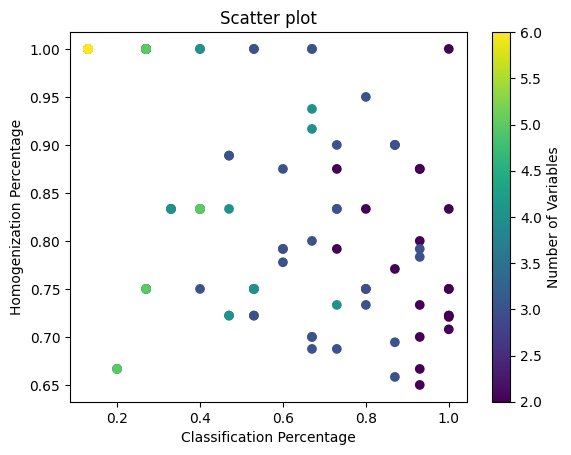

In [ ]:
# Crear el diagrama de puntos
colores =  [item[4] for item in Resumen]

plt.scatter(componente1, componente2, c=colores, cmap='viridis')
# Mostrar la leyenda del color
cbar = plt.colorbar()
cbar.set_label('Number of Variables')
# Etiquetas de los ejes
plt.xlabel('Classification Percentage')
plt.ylabel('Homogenization Percentage')

# Título del gráfico
plt.title('Scatter plot')

---


In [ ]:
!pip install kmodes

In [ ]:
# Importa las bibliotecas necesarias
from kmodes.kmodes import KModes
import pandas as pd

# Carga tus datos (reemplaza con tu propio DataFrame)

# Selecciona las variables categóricas explicativas (X) y la variable respuesta (Y)
X = df.iloc[:, 2:]  # Variables categóricas explicativas
Y = df.iloc[:, 1]   # Variable respuesta

# Crea una instancia del modelo K-modes
k_modes = KModes(n_clusters=2)#, init='Huang', n_init=5, verbose=1)

# Ajusta el modelo a tus datos
clusters = k_modes.fit_predict(X)

# Agrega los resultados de los clusters al DataFrame original
df['Cluster'] = clusters

# Muestra los resultados
print(df[['Cluster', 'y']])

# Puedes explorar más opciones de configuración según tus necesidades


    Cluster  y
0         1  Y
1         1  Y
2         0  N
3         1  Y
4         1  Y
5         0  N
6         1  Y
7         0  Y
8         0  Y
9         0  N
10        0  Y
11        1  Y
12        0  N
13        1  Y
14        0  Y


**Interpretación de resultados:**

Los grupos generados por K-modes se caracterizan por la moda de cada variable categórica.

Analiza las características de cada grupo para determinar qué variables categóricas explicativas influyen más en la variable respuesta.

In [ ]:
# Crea la tabla de contingencia
contingency_table = pd.crosstab(df['Cluster'], df['y'])

print(contingency_table)

y        N  Y
Cluster      
0        4  4
1        0  7


---
---
---
# Numérico

Para las siguientes debo hacer ejemplos numéricos, pues los categóricos no funcionan para comparar con los siguientes algoritmos

In [ ]:
import random
import pandas as pd
N = 100
# Genera 100 números aleatorios entre 0 y 1
x1 = [random.uniform(0, 1) for _ in range(N)]
x2 = [random.uniform(0, 1) for _ in range(N)]
x3 = [random.uniform(0, 1) for _ in range(N)]
x4 = [random.uniform(0, 1) for _ in range(N)]
x5 = [random.uniform(0, 1) for _ in range(N)]
x6 = [random.uniform(0, 1) for _ in range(N)]
x7 = [random.uniform(0, 1) for _ in range(N)]

# Crear la tercera variable según las condiciones
y = []
Cota = 0.5 # es 0 para números entre -1 y 1. es 0.5 para [0,1]
Er = 0.2  #Error
for i in range(N):
    if  x1[i] <= Cota+random.uniform(-Er, Er) and Cota+random.uniform(-Er, Er) <= x2[i] :
        y.append(0)
    elif Cota+random.uniform(-Er, Er) <= x1[i] and x2[i] <= Cota+random.uniform(-Er, Er):
        y.append(0)
    else:
        y.append(1)

Id = range(1,N+1)

# Crear el dataframe
df = pd.DataFrame({"Id": Id,"y": y,"x1": x1, "x2": x2, "x3": x3, "x4": x4, "x5":x5, "x6":x6, "x7":x7})

df.head()

,Id,y,x1,x2,x3,x4,x5,x6,x7
0,1,0,0.839722,0.163253,0.683934,0.469111,0.815501,0.974013,0.558221
1,2,1,0.031105,0.426100,0.756708,0.963407,0.187140,0.167754,0.887266
2,3,0,0.491495,0.063850,0.713521,0.122255,0.842320,0.154720,0.999396
3,4,1,0.884492,0.563644,0.570535,0.520567,0.721445,0.393931,0.827080
4,5,0,0.968420,0.359246,0.778254,0.143815,0.944514,0.581031,0.099538


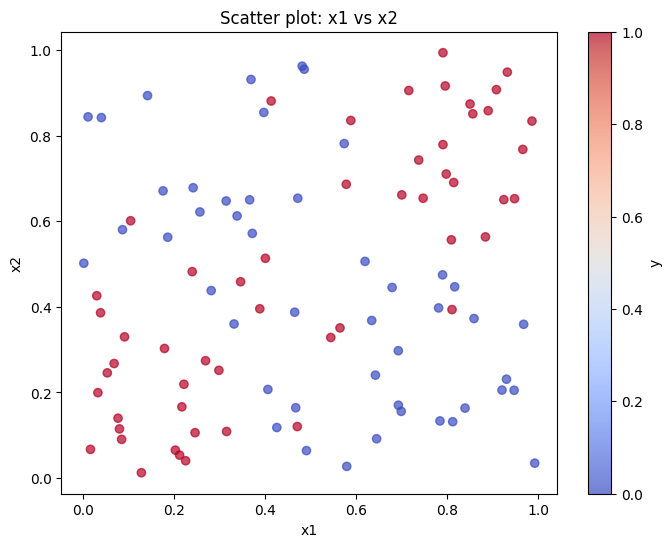

In [ ]:
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot: x1 vs x2')

# Mostrar el plot
plt.show()


#Análisis de correspondencia

Este modelo no explica lo que queremos.

In [ ]:
# !pip install prince

In [ ]:
# # Instala la biblioteca Prince (si aún no lo has hecho)
# # pip install prince

# import pandas as pd
# from prince import CA

# # Carga tus datos (reemplaza con tu propio DataFrame)
# #df = pd.read_csv('tu_archivo.csv')

# # Selecciona las variables categóricas explicativas (X) y la variable respuesta (Y)
# X = df.iloc[:, 2:]  # Variables categóricas explicativas
# Y = df.iloc[:, 1]   # Variable respuesta

# # Realiza el análisis de correspondencia
# ca = CA(n_components=2)  # Puedes ajustar el número de componentes según tus necesidades
# ca.fit(X)

# # Muestra los resultados
# print(ca.row_coordinates(X))

# # Explora más opciones de configuración según tus datos


In [ ]:
#print(ca.column_coordinates(X))

#Aŕboles de desición

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carga tus datos (reemplaza con tu propio DataFrame)
#df = pd.read_csv('tu_archivo.csv')

# Selecciona las variables categóricas explicativas (X) y la variable respuesta (Y)
X = df.iloc[:, 2:]  # Variables categóricas explicativas
Y = df.iloc[:, 1]   # Variable respuesta

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crea el clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrena el modelo
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Puedes explorar más opciones de configuración según tus necesidades


Precisión del modelo: 0.75


In [ ]:
# Crea la tabla de contingencia
contingency_table = pd.crosstab(y_pred, y_test)

print(contingency_table)

y      0  1
row_0      
0      9  3
1      2  6


In [ ]:
print(clf.feature_importances_)


[0.43341843 0.37642532 0.04208754 0.03006253 0.07138613 0.04662005
 0.        ]


#Regresión logistica

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Divide los datos en conjuntos de entrenamiento y prueba
X = df.iloc[:, 2:]  # Variables categóricas explicativas
y = df.iloc[:, 1]   # Variable respuesta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.40      0.67      0.50         9

    accuracy                           0.40        20
   macro avg       0.40      0.42      0.38        20
weighted avg       0.40      0.40      0.36        20



In [ ]:
import statsmodels.api as sm

# Añade una columna constante para el término de intersección
X_train_const = sm.add_constant(X_train)

# Crea el modelo de regresión logística
model_with_const = sm.Logit(y_train, X_train_const)
result = model_with_const.fit()

# Imprime los p-valores
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.653417
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   80
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                            7
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                 0.05046
Time:                        18:14:09   Log-Likelihood:                -52.273
converged:                       True   LL-Null:                       -55.051
Covariance Type:            nonrobust   LLR p-value:                    0.5925
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9900      1.013     -0.977      0.329      -2.976       0.996
x1            -0.4187      0.

In [ ]:
#@title Preparación de los datos:
x1_temp = []
x2_temp = []
x3_temp = []
x4_temp = []
x5_temp = []
x6_temp = []
x7_temp = []

for i in range(N):
    if  x1[i] <= Cota :
        x1_temp.append(0)
    else:
        x1_temp.append(1)

    if  x2[i] <= Cota :
        x2_temp.append(0)
    else:
        x2_temp.append(1)

    if x3[i] <= Cota :
        x3_temp.append(0)
    else:
        x3_temp.append(1)

    if x4[i] <= Cota :
        x4_temp.append(0)
    else:
        x4_temp.append(1)

    if x5[i] <= Cota :
        x5_temp.append(0)
    else:
        x5_temp.append(1)

    if x6[i] <= Cota :
        x6_temp.append(0)
    else:
        x6_temp.append(1)

    if x7[i] <= Cota :
        x7_temp.append(0)
    else:
        x7_temp.append(1)

# Crear el dataframe
df = pd.DataFrame({"Id": Id,"y": y,"x1": x1_temp, "x2": x2_temp, "x3": x3_temp,
                                   "x4": x4_temp, "x5": x5_temp, "x6": x6_temp,
                                   "x7":x7_temp})

df.head()


,Id,y,x1,x2,x3,x4,x5,x6,x7
0,1,0,1,0,1,0,1,1,1
1,2,1,0,0,1,1,0,0,1
2,3,0,0,0,1,0,1,0,1
3,4,1,1,1,1,1,1,0,1
4,5,0,1,0,1,0,1,1,0


In [ ]:
#@title Algorithm
from itertools import combinations
from collections import Counter

N = 1
Resumen = []
item = []
tam_todos = len(list(df[df.columns[0]]))
for p in [2,3,4,5,6]: #Combinaciones de 2 subconjuntos
    subconjuntos = list(combinations(df.columns[2:len(df.columns)], p))

    for caracteristicas in subconjuntos:                # Todos los subconjuntos
        todos = list(df[df.columns[0]])   # saco los id's
        l =[]                                           # lista de todos los grupos
        sublista = []                                   # Grupos a grupo queda en sublista
        item.append(caracteristicas)
        while len(todos) :                              # recorremos todos los elementos
          sublista.append(todos.pop())
          x = df.loc[df['Id'] == sublista[0], caracteristicas].values
          #print(x)
          for Z in todos: #busco los iguales a sublista[0]
            y = df.loc[df['Id'] == Z, caracteristicas].values

            if (x == y).all():
              sublista.append(Z)

          l.append(tuple(sublista))
          #En sublista quedaron los iguales al primero.
          #Actualizo a "todos" quitando los de sublista
          todos = [x for x in todos if x not in sublista]

          sublista = []
          #break

        #Eliminamos singleton para evitar sobre-ajuste
        l = [temp for temp in l if len(temp) != 1]

        tam_l = sum([len(x) for x in l])
        item.append(round(tam_l/tam_todos,2)) #Cuantos clasificó

        #Ahora hay que medír qué tan buena fue la clasificación
        obj = df[df.columns[N]]  #Columna objetivo
        resultado = []                         #resultado de cada grupo
        resul_x_grupo = []
        #print(l)
        for l_ele in l:
            for ele in l_ele:
              ind = df.loc[df[df.columns[0]] == ele].index[0]
              #print(ind, ele, obj[ind])
              resultado.append(obj[ind])
              #print(ele,obj[ind] )
            #print(resultado)
            #print(max(Counter(resultado).values())/len(resultado))
            resul_x_grupo.append(max(Counter(resultado).values())/len(resultado))
            #print(resultado)
            resultado = []

        #Añado el promedio de las clasificaciones de los grupos
        try:
          item.append( sum(resul_x_grupo)/len(resul_x_grupo) )
          item.append(len(resul_x_grupo)) #El tamaño de los grupos
          item.append(p) #Cantidad de subconjuntos
          #print(resul_x_grupo)
          #break
        except:
          item.append(0)
          item.append(0)
          item.append(p) #Cantidad de subconjuntos
          #print(caracteristicas)


        Resumen.append(tuple(item))
        item = []


        #break




      # total_grupos = 1
      # for x in caracteristicas:  #Este for cuenta los grupos esperados
      #   total_grupos *= df[x].nunique()
print("En la variable Resumen quedó:")
print("Subconjunto, porcentaje de clasificación, exactitud de predicción, número de grupos, num de subconjuntos")

Resumen[0:2]

En la variable Resumen quedó:
Subconjunto, porcentaje de clasificación, exactitud de predicción, número de grupos, num de subconjuntos


[(('x1', 'x2'), 1.0, 0.856156185300207, 4, 2),
 (('x1', 'x3'), 1.0, 0.5615073145245559, 4, 2)]

El mejor clasificador en:  2  grupos
('x1', 'x2')
Con un porcentaje de clasificación
100.0 %
Con una exactitud de:
86.0 %
Número de grupos:
4
Distancia:
0.14384381469979302
El mejor clasificador en:  3  grupos
('x1', 'x2', 'x5')
Con un porcentaje de clasificación
100.0 %
Con una exactitud de:
86.0 %
Número de grupos:
8
Distancia:
0.13748541083099908
El mejor clasificador en:  4  grupos
('x1', 'x2', 'x4', 'x7')
Con un porcentaje de clasificación
100.0 %
Con una exactitud de:
88.0 %
Número de grupos:
16
Distancia:
0.12226037851037841
El mejor clasificador en:  5  grupos
('x1', 'x2', 'x3', 'x5', 'x6')
Con un porcentaje de clasificación
99.0 %
Con una exactitud de:
89.0 %
Número de grupos:
29
Distancia:
0.11251423479766738
El mejor clasificador en:  6  grupos
('x1', 'x2', 'x3', 'x5', 'x6', 'x7')
Con un porcentaje de clasificación
83.0 %
Con una exactitud de:
89.0 %
Número de grupos:
32
Distancia:
0.2018643841808021


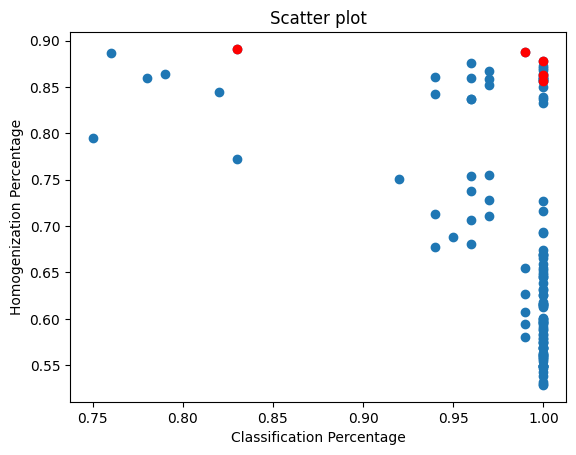

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer las componentes 1 y 2
componente1 = [item[1] for item in Resumen]
componente2 = [item[2] for item in Resumen]

# Crear el diagrama de puntos
plt.scatter(componente1, componente2)

# Etiquetas de los ejes
plt.xlabel('Classification Percentage')
plt.ylabel('Homogenization Percentage')

# Título del gráfico
plt.title('Scatter plot')

# Punto de referencia
punto_referencia = np.array([1, 1])

valores_unicos = set()
for elemento in Resumen:
    valor = elemento[4]  # Obtiene el valor en la cuarta posición
    valores_unicos.add(valor)  # Agrega el valor al conjunto

# Convierte el conjunto de valores únicos de nuevo a una lista
lista_valores_unicos = list(valores_unicos)
lista_valores_unicos

for x in lista_valores_unicos:
    sublista = [elemento for elemento in Resumen if elemento[4] == x]

    # Extraer las componentes 1 y 2
    com1 = [item[1] for item in sublista]
    com2 = [item[2] for item in sublista]

    # Calcular las distancias euclidianas a partir del punto de referencia
    distancias = np.linalg.norm(np.array([com1, com2]).T - punto_referencia, axis=1)

    # Índice del punto más cercano a (1, 1)
    indice_punto_cercano = np.argmin(distancias)

    plt.scatter(com1[indice_punto_cercano], com2[indice_punto_cercano], color='red')

    print("El mejor clasificador en: ", x, " grupos")
    print(sublista[indice_punto_cercano][0])
    print("Con un porcentaje de clasificación")
    print(sublista[indice_punto_cercano][1]*100, "%")
    print("Con una exactitud de:")
    print(round(sublista[indice_punto_cercano][2]*100, 0), "%")
    print("Número de grupos:")
    print(sublista[indice_punto_cercano][3])
    print("Distancia:")
    print(np.min(distancias))

# Mostrar el gráfico
plt.show()


Text(0.5, 1.0, 'Scatter plot')

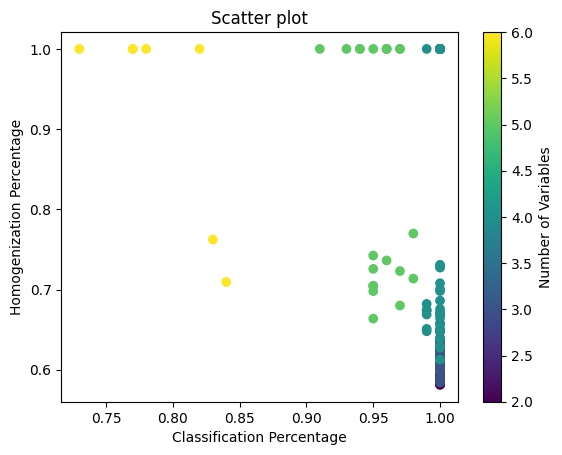

In [ ]:
# Crear el diagrama de puntos
colores =  [item[4] for item in Resumen]

plt.scatter(componente1, componente2, c=colores, cmap='viridis')
# Mostrar la leyenda del color
cbar = plt.colorbar()
cbar.set_label('Number of Variables')
# Etiquetas de los ejes
plt.xlabel('Classification Percentage')
plt.ylabel('Homogenization Percentage')

# Título del gráfico
plt.title('Scatter plot')

---
#Regresión logística

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Divide los datos en conjuntos de entrenamiento y prueba
X = df.iloc[:, 2:]  # Variables categóricas explicativas
y = df.iloc[:, 1]   # Variable respuesta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.57      0.57      0.57        14

    accuracy                           0.40        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.40      0.40      0.40        20



In [ ]:
import statsmodels.api as sm

# Añade una columna constante para el término de intersección
X_train_const = sm.add_constant(X_train)

# Crea el modelo de regresión logística
model_with_const = sm.Logit(y_train, X_train_const)
result = model_with_const.fit()

# Imprime los p-valores
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.645754
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   80
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                            7
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                 0.05773
Time:                        22:17:04   Log-Likelihood:                -51.660
converged:                       True   LL-Null:                       -54.825
Covariance Type:            nonrobust   LLR p-value:                    0.5018
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1067      0.612      1.807      0.071      -0.094       2.307
x1             0.2050      0.

#Arboldes de nuevo

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carga tus datos (reemplaza con tu propio DataFrame)
#df = pd.read_csv('tu_archivo.csv')

# Selecciona las variables categóricas explicativas (X) y la variable respuesta (Y)
X = df.iloc[:, 2:]  # Variables categóricas explicativas
Y = df.iloc[:, 1]   # Variable respuesta

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crea el clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrena el modelo
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Puedes explorar más opciones de configuración según tus necesidades


Precisión del modelo: 0.80


In [ ]:
# Crea la tabla de contingencia
contingency_table = pd.crosstab(y_pred, y_test)

print(contingency_table)
print(clf.feature_importances_)

y      0   1
row_0       
0      5   3
1      1  11
[0.4825312  0.40845818 0.         0.03345666 0.         0.01344264
 0.06211132]
